# Level-Difficulty-in-Candy-Crush-Saga

## Project Description
Candy Crush Saga is a hit mobile game developed by King (part of Activision|Blizzard) that is played by millions of people all around the world.The game is structured as a series of levels where players need to match similar candy together to (hopefully) clear the level and keep progressing on the level map.Candy Crush has more than 3000 levels, and new ones are added every week. That is a lot of levels! And with that many levels, it’s important to get level difficulty just right. Too easy and the game gets boring, too hard and players become frustrated and quit playing.
In this project I worked with a real Candy Crush data set and use this data to estimate level difficulty. This project assumes that we can manipulate data frames using dplyr and make simple plots using ggplot2. 

### Project Tasks
1:Candy Crush Saga
2:The data set
3:Checking the data set
4:Computing level difficulty
5:Plotting difficulty profile
6:Spotting hard levels
7:Computing uncertainty
8:Showing uncertainty
9:A final metric
10:Should our level designer worry?

#### Task 1: Candy Crush Saga
In this project, we will see how we can use data collected from players to estimate level difficulty. Let’s start by loading in the packages we’re going to need

In [1]:
# This sets the size of plots to a good default.
options(repr.plot.width = 5, repr.plot.height = 4)

# Loading in packages
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


#### Task 2: The Data Set
The dataset I am using contains one week of data from a sample of players who played Candy Crush back in 2014. The data is also from a single episode, that is, a set of 15 levels. It has the following columns:

player_id: a unique player id dt: the date level: the level number within the episode, from 1 to 15. num_attempts: number of level attempts for the player on that level and date. num_success: number of level attempts that resulted in a success/win for the player on that level and date. The granularity of the dataset is player, date, and level. That is, there is a row for every player, day, and level recording the total number of attempts and how many of those resulted in a win.

Now, let’s load in the dataset and take a look at the first couple of rows.

In [3]:
# Reading in the data
data <- read_csv("candy_crush.csv")

# Printing out the first couple of rows
head(data)

Parsed with column specification:
cols(
  player_id = col_character(),
  dt = col_date(format = ""),
  level = col_integer(),
  num_attempts = col_integer(),
  num_success = col_integer()
)


player_id,dt,level,num_attempts,num_success
6dd5af4c7228fa353d505767143f5815,2014-01-04,4,3,1
c7ec97c39349ab7e4d39b4f74062ec13,2014-01-01,8,4,1
c7ec97c39349ab7e4d39b4f74062ec13,2014-01-05,12,6,0
a32c5e9700ed356dc8dd5bb3230c5227,2014-01-03,11,1,1
a32c5e9700ed356dc8dd5bb3230c5227,2014-01-07,15,6,0
b94d403ac4edf639442f93eeffdc7d92,2014-01-01,8,8,1


#### Task 3: Checking the data set
Now that I have loaded the dataset let’s count how many players we have in the sample and how many days worth of data we have.

In [4]:
print("Number of players:")
length(unique(data$player_id))

print("Period for which we have data:")
range(data$dt)

[1] "Number of players:"


[1] 6814

[1] "Period for which we have data:"


[1] "2014-01-01" "2014-01-07"

#### Task 4:Computing level difficulty
Within each Candy Crush episode, there is a mix of easier and tougher levels. Luck and individual skill make the number of attempts required to pass a level different from player to player. The assumption is that difficult levels require more attempts on average than easier ones. That is, the harder a level is, the lower the probability to pass that level in a single attempt is.
A simple approach to model this probability is as a Bernoulli process; as a binary outcome (you either win or lose) characterized by a single parameter pwin: the probability of winning the level in a single attempt. This probability can be estimated for each level as:
For example, let’s say a level has been played 10 times and 2 of those attempts ended up in a victory. Then the probability of winning in a single attempt would be pwin = 2 / 10 = 20%.
Now, let’s compute the difficulty pwin separately for each of the 15 levels.

In [5]:
# Calculating level difficulty
difficulty <- data %>%
    group_by(level) %>%
    summarise(wins = sum(num_success), attempts = sum(num_attempts)) %>%
    mutate(p_win = wins / attempts)
# Printing out the level difficulty
difficulty

level,wins,attempts,p_win
1,818,1322,0.61875946
2,666,1285,0.51828794
3,662,1546,0.42820181
4,705,1893,0.37242472
5,634,6937,0.09139397
6,668,1591,0.41986172
7,614,4526,0.13566063
8,641,15816,0.04052858
9,670,8241,0.08130081
10,617,3282,0.18799512


#### Task 5:Plotting difficulty profile
We now have the difficulty for all the 15 levels in the episode. Keep in mind that, as we measure difficulty as the probability to pass a level in a single attempt, a lower value (a smaller probability of winning the level) implies a higher level difficulty.

Now that we have the difficulty of the episode we should plot it. Let’s plot a line graph with the levels on the X-axis and the difficulty (pwin) on the Y-axis. We call this plot the difficulty profile of the episode.

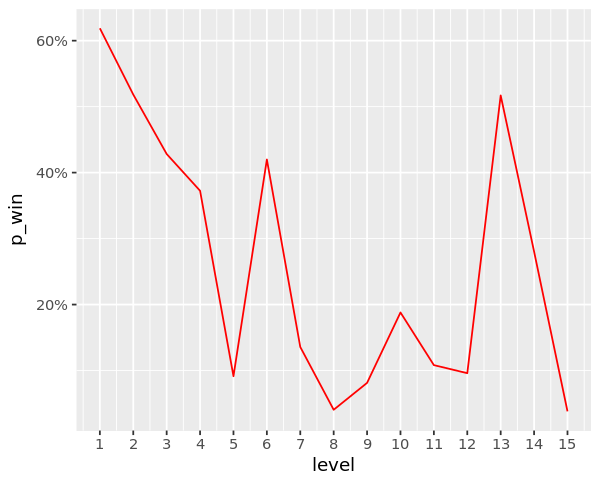

In [6]:
# Plotting the level difficulty profile
ggplot(difficulty, aes(x = level, y = p_win)) +
    geom_line(color='red') +
    scale_x_continuous(breaks = c(1:15)) +
    scale_y_continuous(labels = scales::percent)

#### Task 6: Spotting hard levels
What constitutes a hard level is subjective. However, to keep things simple, we could define a threshold of difficulty, 
say 10%, and label levels with pwin < 10% as hard. It’s relatively easy to spot these hard levels on the plot, but we can
make the plot more friendly by explicitly highlighting the hard levels

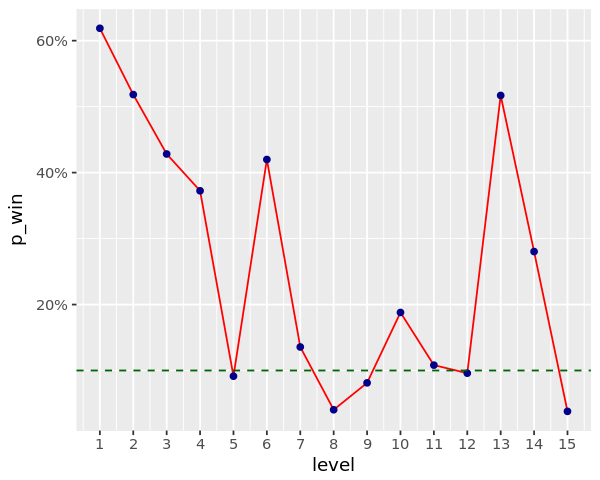

In [7]:
# Adding points and a dashed line
ggplot(difficulty, aes(x = level, y = p_win)) +
    geom_line(color='red') +
    geom_point(color='darkblue') +
    geom_hline(yintercept = 0.10, linetype = "dashed",color='darkgreen') +
    scale_x_continuous(breaks = c(1:15)) +
    scale_y_continuous(labels = scales::percent)

#### Task 7: Computing uncertainty
We already have all we need in the difficulty data frame! Every level has been played n number of times and we
have their difficulty pwin. Now, let’s calculate the standard error for each level.

In [10]:
# Computing the standard error of p_win for each level
difficulty <- difficulty %>%
    mutate(error = sqrt(p_win * (1 - p_win) / attempts))

#### Task 8: Showing uncertainty
Now that we have a measure of uncertainty for each levels’ difficulty estimate let’s use error bars to show this 
uncertainty in the plot. We will set the length of the error bars to one standard error. The upper limit and the 
lower limit of each error bar should then be pwin + Ïerror and pwin - Ïerror,
respectively.

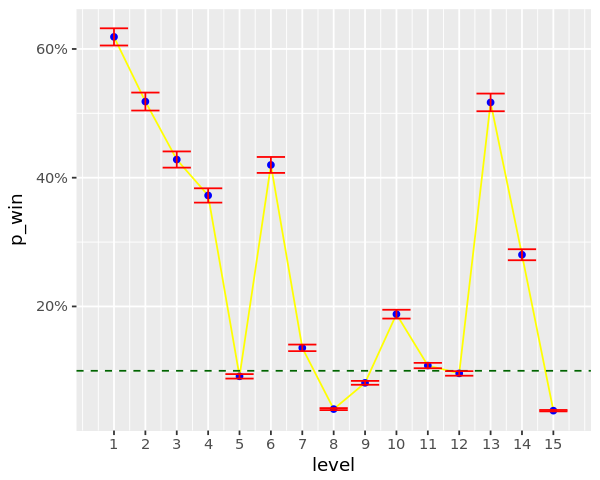

In [11]:
# Adding standard error bars
ggplot(difficulty, aes(x = level, y = p_win)) +
    geom_line(color='yellow') +
    geom_point(color='blue') +
    geom_hline(yintercept = 0.10, linetype = "dashed",color='darkgreen') +
    geom_errorbar(aes(ymin = p_win - error, ymax = p_win + error),color='red') +
    scale_x_continuous(breaks = c(1:15)) +
    scale_y_continuous(labels = scales::percent)

#### Task 9: A final metric
It looks like our difficulty estimates are pretty precise! Using this plot, a level designer can quickly spot where the
hard levels are and also see if there seems to be too many hard
levels in the episode.

One question a level designer might ask is: “How likely is it that a player will complete the episode without
losing a single time?” Let’s calculate this using the estimated level difficulties!

In [12]:
# The probability of completing the episode without losing a single time
p <- prod(difficulty$p_win)

# Printing it out
p

[1] 9.447141e-12

#### Task 10: Should our level designer worry?
Given the probability we just calculated, should our level designer worry about that a lot of players
might complete the episode in one attempt?

In [ ]:
# Should our level designer worry about that a lot of 
# players will complete the episode in one attempt?
should_the_designer_worry = FALSE # TRUE / FALSE